In [1]:
import pandas as pd
import numpy as np

In [2]:
owid_covid19 = pd.read_csv('./dataset/OWID/owid-covid-data.csv')
owid_covid19.head(2) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [9]:
owid_covid19_japan=owid_covid19.query('location=="Japan"')[160:]
day_num=list(range(1,owid_covid19_japan.shape[0]+1))
owid_covid19_japan['day_num']=day_num
owid_covid19_japan.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,day_num
18826,JPN,Asia,Japan,2020-06-08,17174.0,33.0,41.429,916.0,0.0,3.429,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,1
18827,JPN,Asia,Japan,2020-06-09,17210.0,36.0,40.000,916.0,0.0,3.143,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,2
18828,JPN,Asia,Japan,2020-06-10,17251.0,41.0,37.857,919.0,3.0,2.714,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,3
18829,JPN,Asia,Japan,2020-06-11,17292.0,41.0,39.143,920.0,1.0,2.429,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,4
18830,JPN,Asia,Japan,2020-06-12,17332.0,40.0,38.286,922.0,2.0,2.143,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,5
18831,JPN,Asia,Japan,2020-06-13,17382.0,50.0,39.857,924.0,2.0,1.429,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,6
18832,JPN,Asia,Japan,2020-06-14,17429.0,47.0,41.143,925.0,1.0,1.286,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,7
18833,JPN,Asia,Japan,2020-06-15,17502.0,73.0,46.857,925.0,0.0,1.286,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,8
18834,JPN,Asia,Japan,2020-06-16,17587.0,85.0,53.857,927.0,2.0,1.571,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,9
18835,JPN,Asia,Japan,2020-06-17,17628.0,41.0,53.857,931.0,4.0,1.714,...,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,10


In [10]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b
def fit_logistic(all_data,train_lim, target):
    data_cp = all_data.copy()
    y = data_cp[:train_lim][target].astype(np.int32)
    x = list(range(0, len(y)))

    # Initial guess
    p0 = [0,1,1,0]

    (a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, x, y, bounds=(0, [500000., 10., 1000., 1000., ]), p0=p0, maxfev=10**9)
    y_fit = logistic_function(x, a_, b_, c_, d_)
    
    return x, y, y_fit, (a_, b_, c_, d_), cov
def plot_logistic(x, y, y_fit,country_name,target):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'o')
    ax.plot(x, y_fit, '-')
    ax.set_xlabel("Day count (starting on 2020-06-08)")
    ax.set_ylabel(target)
    ax.set_title("Fit to logistic regression for "+ country_name)
def plot_logistic_country(all_data, train, valid_num, country_name,target, x, a_, b_, c_, d_):
    forecast = logistic_function(list(range(len(x)+60)), a_, b_, c_, d_)
    df_train = train[target][:]
    df_fcst = forecast[:len(df_train)]
    dates = list(range(0,len(df_train)))
    
    # Plot results
    fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
    ax1.plot(dates, df_fcst)
    ax1.plot(dates, df_train)
    ax1.axvline(len(df_train)-valid_num-1, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.set_title("Actual new cases vs predictions based on Logistic curve for "+country_name)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count starting on 2020-06-08")
    ax1.set_ylabel("ConfirmedCases")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize

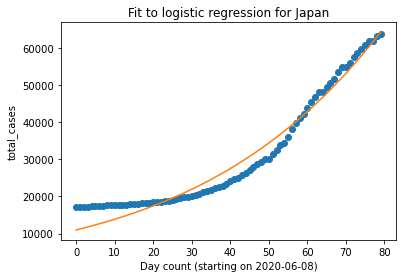

In [16]:
# Fit country to logistic curve
train_lim = 80
valid_lim = 119 # needs to be changed as more days of training data are included
#test_lim = 112
valid_num=valid_lim-train_lim 
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(owid_covid19_japan, train_lim, 'total_cases')
plot_logistic(x, y, y_fit,'Japan','total_cases')

In [14]:
train=owid_covid19_japan[:train_lim]

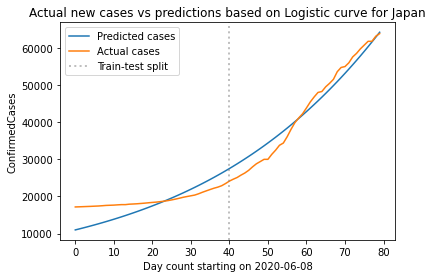

In [17]:
plot_logistic_country(owid_covid19_japan, train, valid_num, 'Japan','total_cases', x, a_, b_, c_, d_)